# Лабораторная работа №3

**Задание.**
*Переписать следующий код, используй функции SageMath.*

## <span style="color:gray">Часть 1 - Модель "Хищник-Жертва"</span>

**Исходный код**

(0.0, 3.0)

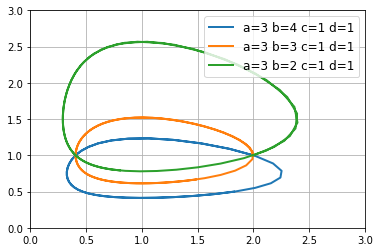

In [1]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt
def f(y, t,params):
    y1, y2 = y
    a,b,c,d=params
    return [y1*(a-b*y2),y2*(-c+d*y1)]
t = np.linspace(0,7,71)
y0 = [2, 1]
fig = plt.figure(facecolor='white')
for b in range(4,1,-1):
    params=[3,b,1,1]
    st='a=%d b=%d c=%d d=%d' % tuple(params)
    [y1,y2]=odeint(f, y0, t,args=(params,), full_output=False).T
    plt.plot(y1,y2,linewidth=2, label=st)
plt.legend(fontsize=12)
plt.grid(True)
plt.xlim(0,3)
plt.ylim(0,3)

**Новый код**

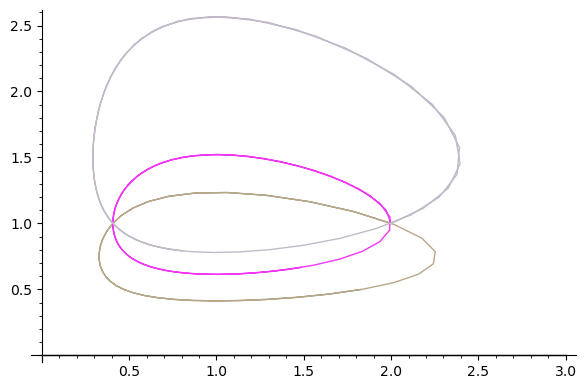

In [2]:
var('y1, y2')

t = np.linspace(0, 7, 71)
y0 = [2, 1]
a,b,c,d = 3,1,1,1

pt = plot(0, (x, 0, 3), color='black')

for b in range(4,1,-1):
    params=[a,b,c,d]
    st='a=%d b=%d c=%d d=%d' % tuple(params)
    f = [y1 * (a - b * y2), y2 * (-c + d * y1)]
    sol=desolve_odeint(f, y0, t, dvars = [y1, y2])
    pt += line(sol,rgbcolor=(randint(0,256)/256, randint(0,256)/256, randint(0,256)/256))
    
pt.show()

## <span style="color:gray">Часть 2 - Моделирование движения тела, брошенного под углом к горизонту</span>

**Исходный код**

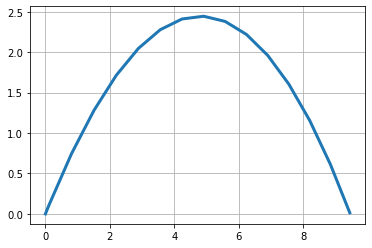

In [3]:
from scipy.integrate import ode
import numpy as np
import matplotlib.pyplot as plt

ts = [ ]
ys = [ ]


def fout(t, y): # обработчик шага
    ts.append(t)
    ys.append(list(y.copy()))

    
def f(t, y): # функция правой части системы ОДУ
    k=0.01
    g=9.81
    y1, y2, y3, y4 = y
    return [y2,
    -k*y2*sqrt(y2**2+y4**2),
    y4,
    -k*y4*sqrt(y2**2+y4**2)-g]


tmax=1.41 # время движения, подбирается экспериментально
alph=np.pi/4 # угол бросания тела
v0=10.0 # начальная скорость
ODE=ode(f)
y0,t0=[0, v0*np.cos(alph), 0, v0*np.sin(alph)], 0 # начальные условия

r=ODE.set_integrator('dopri5', max_step=0.1) # метод Рунге – Кутта
r.set_solout(fout) # загрузка обработчика шага
r=ODE.set_initial_value(y0, t0) # задание начальных значений
ret = r.integrate(tmax) # решаем ОДУ

Y=np.array(ys)

fig, ax = plt.subplots()
fig.set_facecolor('white')
ax.plot(Y[:,0],Y[:,2],linewidth=3) # график решения
ax.grid(True)

**Новый код**

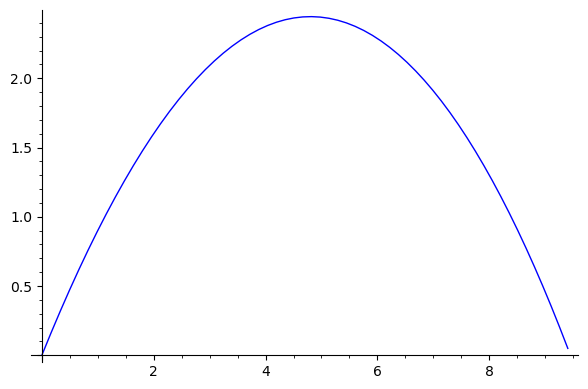

In [4]:
from scipy.integrate import ode
import numpy as np
import matplotlib.pyplot as plt

tmax=1.41 # время движения, подбирается экспериментально
alph=np.pi/4 # угол бросания тела
v0=10.0 # начальная скорость
y0,t0=[0, v0*np.cos(alph), 0, v0*np.sin(alph)], 0 # начальные условия

var('y1, y2, y3, y4')

t = np.linspace(0, 7, 300)

k=0.01
g=9.81
f = [y2, -k*y2*sqrt(y2**2+y4**2), y4, -k*y4*sqrt(y2**2+y4**2)-g]

sol = desolve_odeint(f, y0, t, dvars=[y1, y2, y3, y4])

arr = [[row[0], row[2]] for row in sol if row[0] >= 0 and row[2] >= 0] # list comprehension
    
line(arr).show()